In [2]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 80)

In [3]:
def get_dataframe(name):
    
    file_name = f'Output/{name}.csv'
    return pd.read_csv(file_name)

df = get_dataframe('dataset_filtered')

C:\Users\anasn\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (4,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


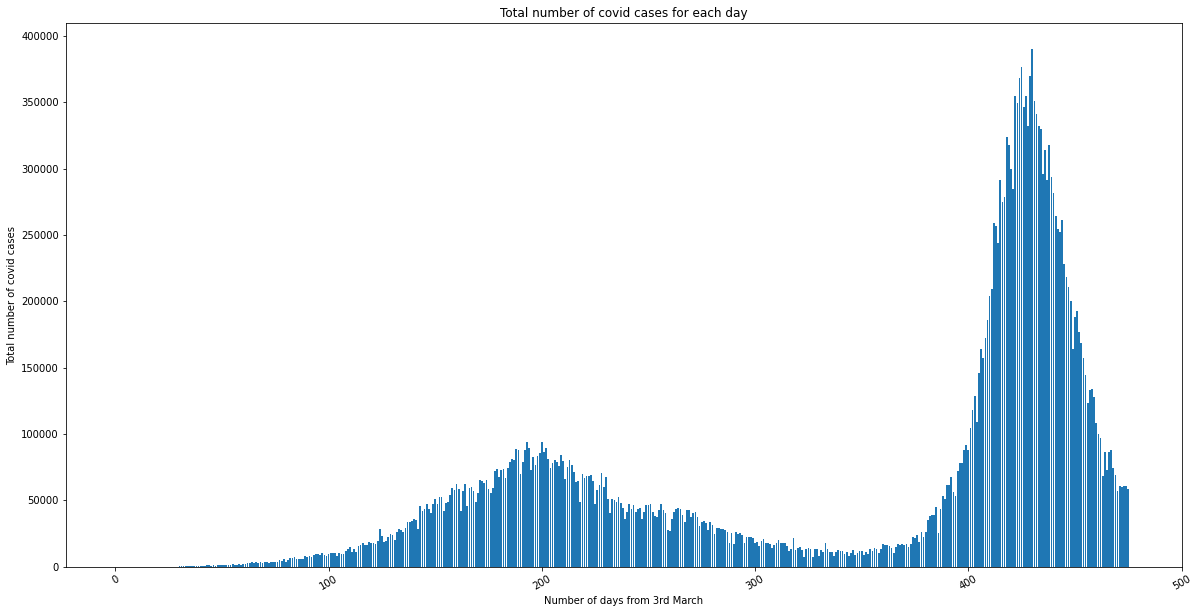

In [29]:
def plot_cases():
    df = get_dataframe('summary')
    length = len(df)
    
    plt.figure(figsize=(20, 10))
    
    num_cases = list(df['Total Number of cases'])

    total_days = [i for i in range(1, length+1)]
    plt.bar(total_days, num_cases)
    plt.title("Total number of covid cases for each day")
    plt.xlabel("Number of days from 3rd March")
    plt.ylabel("Total number of covid cases")
    plt.xticks(rotation=30)
    plt.show()
    
plot_cases()

### Number of covid cases and fatalities reported by each state

In [28]:
def age_state():
    age_dist = dict()
    age_deceased_dist = dict() 
    for state in df['Detected State'].unique():
        age_dist[state] = df[(df['Detected State'] == state) & df['Age Bracket'].notnull()].shape[0]
        
    for state in df['Detected State'].unique():
        age_deceased_dist[state] = df[(df['Detected State'] == state) & df['Age Bracket'].notnull() & (df['Current Status'] == 'Deceased')].shape[0]
        
    display(age_dist)
    display(age_deceased_dist)
    
age_state()

{'Kerala': 9159,
 'Delhi': 15,
 'Telangana': 43,
 'Haryana': 18,
 'Uttar Pradesh': 44,
 'Ladakh': 2,
 'Tamil Nadu': 18861,
 'Jammu and Kashmir': 14,
 'Karnataka': 70884,
 'Maharashtra': 63,
 'Punjab': 37,
 'Rajasthan': 32,
 'Andhra Pradesh': 367,
 'Uttarakhand': 750,
 'Odisha': 1646,
 'Puducherry': 9,
 'West Bengal': 23,
 'Chandigarh': 3178,
 'Chhattisgarh': 7,
 'Gujarat': 266,
 'Himachal Pradesh': 13,
 'Madhya Pradesh': 21,
 'Bihar': 9168,
 'Manipur': 687,
 'Mizoram': 21,
 'Goa': 154,
 'Andaman and Nicobar Islands': 4,
 'Jharkhand': 2,
 'Assam': 603,
 'Arunachal Pradesh': 36,
 nan: 0,
 'Tripura': 1,
 'Meghalaya': 14,
 'Dadra and Nagar Haveli and Daman and Diu': 17,
 'State Unassigned': 0,
 'Sikkim': 7,
 'Nagaland': 0,
 'Lakshadweep': 0}

{'Kerala': 8932,
 'Delhi': 3,
 'Telangana': 15,
 'Haryana': 2,
 'Uttar Pradesh': 1,
 'Ladakh': 0,
 'Tamil Nadu': 206,
 'Jammu and Kashmir': 2,
 'Karnataka': 5730,
 'Maharashtra': 15,
 'Punjab': 2,
 'Rajasthan': 12,
 'Andhra Pradesh': 1,
 'Uttarakhand': 720,
 'Odisha': 1419,
 'Puducherry': 3,
 'West Bengal': 2,
 'Chandigarh': 460,
 'Chhattisgarh': 1,
 'Gujarat': 136,
 'Himachal Pradesh': 2,
 'Madhya Pradesh': 2,
 'Bihar': 7,
 'Manipur': 637,
 'Mizoram': 2,
 'Goa': 148,
 'Andaman and Nicobar Islands': 1,
 'Jharkhand': 0,
 'Assam': 600,
 'Arunachal Pradesh': 36,
 nan: 0,
 'Tripura': 0,
 'Meghalaya': 13,
 'Dadra and Nagar Haveli and Daman and Diu': 1,
 'State Unassigned': 0,
 'Sikkim': 4,
 'Nagaland': 0,
 'Lakshadweep': 0}

In [35]:
def plot_gender_distribution(state, file_name='State wise distribution'):
    df = get_dataframe(file_name)
    df = df[df['State'] == state]
    age_distribution = [f'{i}-{i+9}' for i in range(1, 80, 10)]
    age_distribution.append('80 or more')
    
    def get_male_cases():
        df_male_cases = df.iloc[:, 25: 34]
#         display(df_male_cases)
        return [sum(df_male_cases[col]) for col in df_male_cases]
    
    def get_female_cases():
        df_female_cases = df.iloc[:, 16: 25]
#         display(df_female_cases)
        return [sum(df_female_cases[col]) for col in df_female_cases]
    
    def get_male_fatalities():
        df_male_fatalities = df.iloc[:, 52:]
#         display(df_male_fatalities)
        return [sum(df_male_fatalities[col]) for col in df_male_fatalities]
        
    def get_female_fatalities():
        df_female_fatalities = df.iloc[:, 43:52]
#         display(df_female_fatalities)
        return [sum(df_female_fatalities[col]) for col in df_female_fatalities]
    
    def plot_cases():
        width = 0.2
        fig = plt.subplots(figsize=(12, 8))
        
        male_cases = get_male_cases()
        female_cases = get_female_cases()
        
        br1 = range(9)
        br2 = [x + width for x in br1]


        plt.bar(br1, male_cases, color ='b', width = width,
    edgecolor ='grey', label ='Male Cases')
        plt.bar(br2, female_cases, color ='r', width = width,
    edgecolor ='grey', label ='Female Cases')

        plt.title(f'Covid cases distribution age and gender wise for {state}')
        plt.xlabel('Age', fontweight ='bold', fontsize = 15)
        plt.ylabel('Covid Cases', fontweight ='bold', fontsize = 15)
        plt.xticks([r + width for r in range(9)],
            age_distribution)

        plt.legend()
        plt.show()
        
    def plot_fatalities():
        width = 0.2
        fig = plt.subplots(figsize=(12, 8))
        
        male_fatalities = get_male_fatalities()
        female_fatalities = get_female_fatalities()
        
        br1 = range(9)
        br2 = [x + width for x in br1]
        plt.bar(br1, male_fatalities, color ='b', width = width,
            edgecolor ='grey', label ='Male Fatalities')
        plt.bar(br2, female_fatalities, color ='r', width = width,
            edgecolor ='grey', label ='Female Fatalities')
        
        plt.title(f'Fatalities distribution age and gender wise for {state}')
        plt.xlabel('Age', fontweight ='bold', fontsize = 15)
        plt.ylabel('Covid Fatalities', fontweight ='bold', fontsize = 15)
        plt.xticks([r + width for r in range(9)],
            age_distribution)

        plt.legend()
        plt.show()
        
#     get_female_fatalities()
    plot_cases()
    plot_fatalities()    
    
# plot_gender_distribution()

### Plotting covid cases and fatalities graph for different state

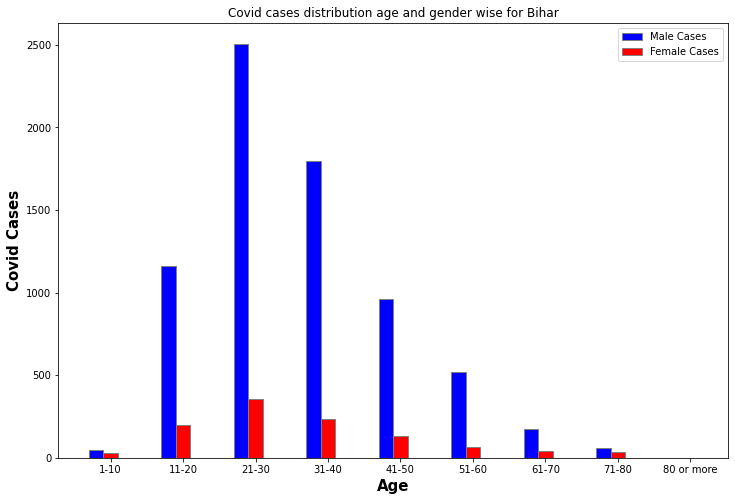

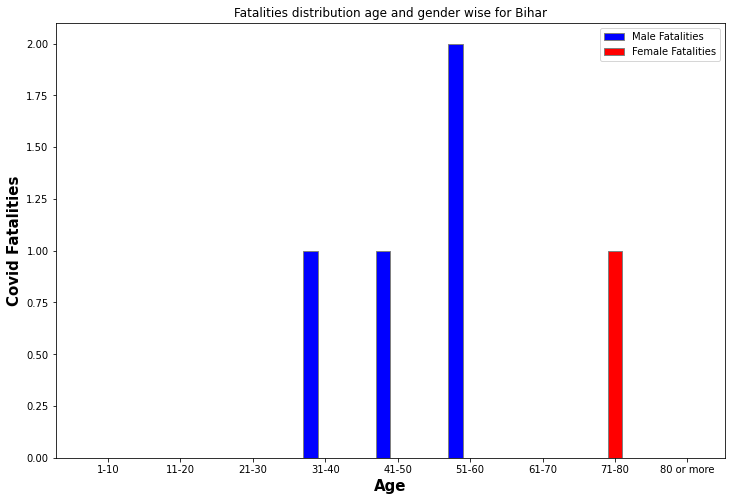

In [36]:
plot_gender_distribution('Bihar')

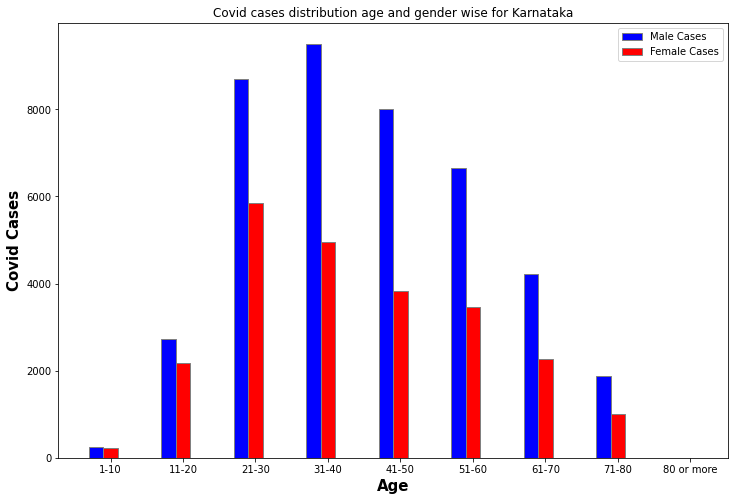

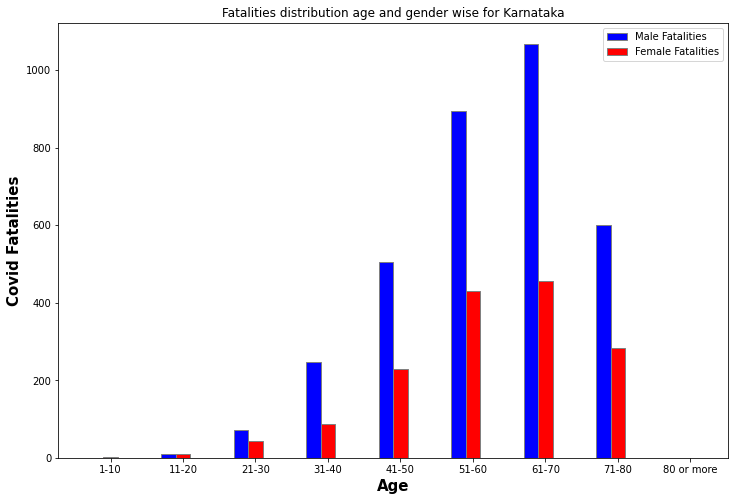

In [37]:
plot_gender_distribution('Karnataka')

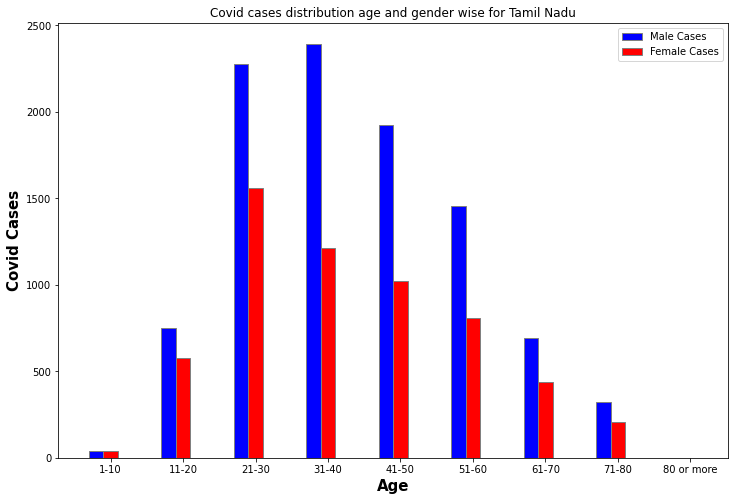

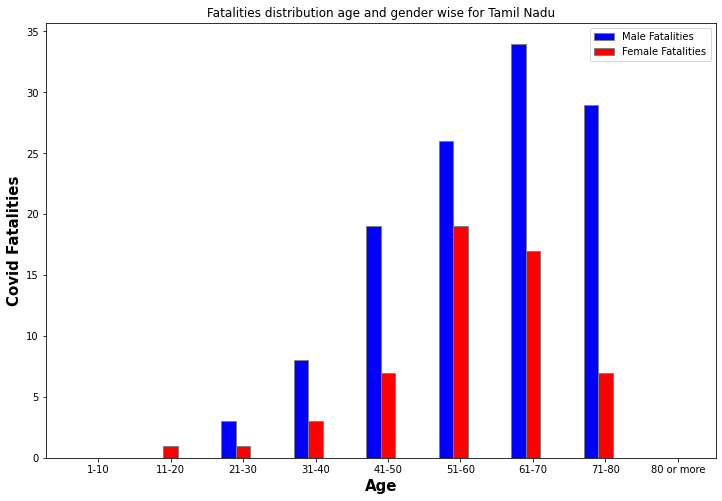

In [38]:
plot_gender_distribution('Tamil Nadu')

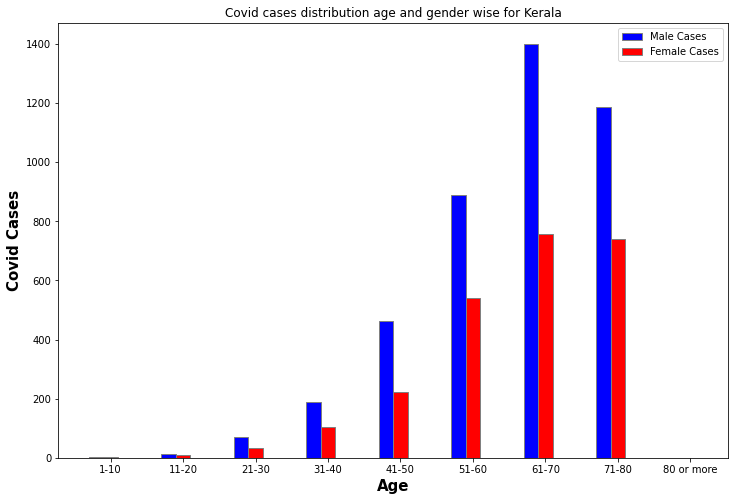

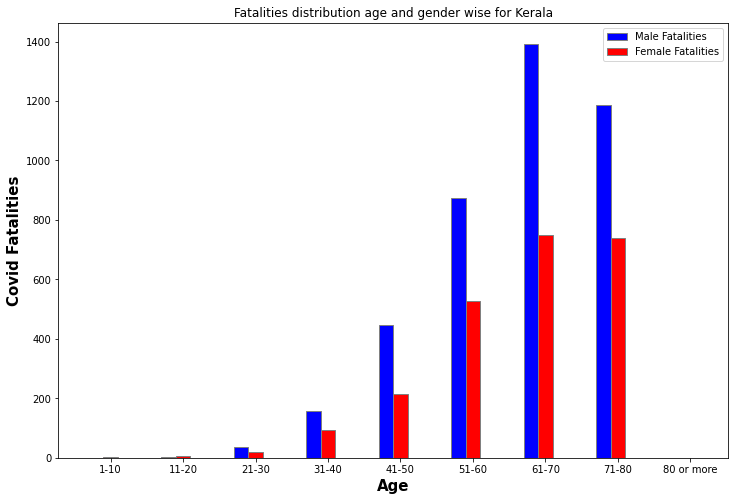

In [39]:
plot_gender_distribution('Kerala')